<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/Copy_of_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer #tokenization
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
905,entertainment,bets off after big brother leak a bookmaker ...
856,entertainment,double eviction from big brother model caprice...
397,politics,lawyer attacks anti-terror laws a senior barri...
1733,sport,borders 19-20 ulster ulster clung on for a mor...
2154,business,green reports shun supply chain nearly 20% mor...
...,...,...
2095,tech,souped-up wi-fi is on the horizon super high-s...
837,business,sec to rethink post-enron rules the us stock m...
1628,politics,malik rejects all-black mp lists a call for et...
718,tech,apple attacked over sources row civil libertie...


In [4]:
#No of a categories
len(set(df['category']))

5

In [5]:
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

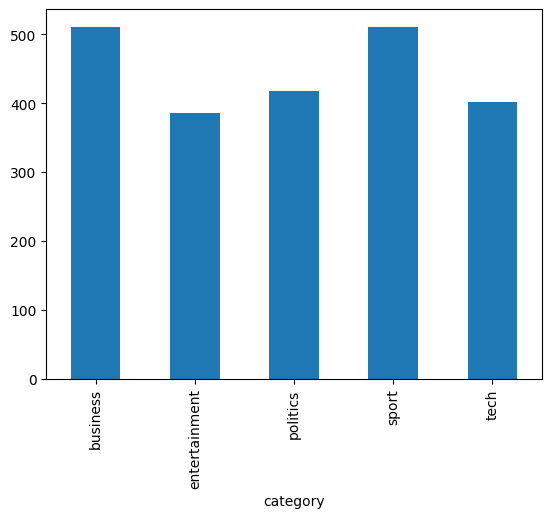

In [6]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [7]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#stop words
nltk.download('stopwords')
words = stopwords.words("nepali")
print(words)

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['text'][905]).lower() #character to character
regs

'bets off after big brother  leak  a bookmaker has stopped taking bets on celebrity big brother after claiming  sensitive information  about the channel   show had been leaked   william hill made the move after four people tried to place bets on friday s surprise double eviction   this is highly unlikely to have been an inspired guess   william hill spokesman rupert adams said  however  a big brother spokeswoman was  satisfied  that sensitive information about the show remained confidential   the bookmaker said its suspicions had been aroused by betting for the last two contestant evictions  when people were still trying to place large sums despite odds as short as       but william hill s  overwhelming evidence  came on friday when four unknown callers asked to place bets on the show s surprise double eviction   shortly afterwards model caprice and actor jeremy edwards left the show  mr adams believed someone had gained access to figures which revealed how viewers were voting  and was

In [10]:
# Data Cleaning using stemmer works on word to word
#stremming le root word patta lagauxa then tei anusar word xutauxa
stemmer = PorterStemmer()
data = "I am loving computing".split()
print(data)
[stemmer.stem(i) for i in data]
# stemmer.stem("")

['I', 'am', 'loving', 'computing']


['i', 'am', 'love', 'comput']

In [11]:
# Data Cleaning using stemmer works on word to word

stemmer = PorterStemmer()
data = "I am loving computing".split()
print(data)
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

['I', 'am', 'loving', 'computing']


'i am love comput'

In [12]:
# Data Cleaning using stemmer works on word to word

stemmer = PorterStemmer()
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

'i am love comput'

In [13]:
# stemmer = PorterStemmer()
# data = df['text'[0]].split()
# print(len(data))
# " ".join([stemmer.stem(i) for i in df['text'][0]])
# # stemmer.stem("")

In [30]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
print(words)
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

'tv future hands viewers home theatre systems plasma high definition tvs digital video recorders moving living room way people watch tv radically different five years time according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices one talked technologies ces digital personal video recorders dvr pvr set top boxes like us tivo uk sky system allow people record store play pause forward wind tv programmes want essentially technology allows much personalised tv also built high definition tv sets big business japan us slower take europe lack high definition programming people forward wind adverts also forget abiding network channel schedules putting together la carte entertainment us networks cable satellite companies worried means terms advertising revenues we

In [35]:
regs = re.sub("[^a-zA-Z]", " ", df['text'][2154]).lower() #character to character
regs

'green reports shun supply chain nearly     more uk top     firms produced non financial reports on social and environment issues than last year   but of the     companies reporting      didn t examine their supply chains  says the annual directions survey  green groups say putting pressure on supply chains is a major way companies can reduce their environmental impact  the survey is published by corporate social responsibility firm context and branding firm salterbaxter   blake lee harwood  campaigns director at greenpeace in the uk  said   it s fairly meaningless to talk about your company s direction in terms of sustainability without having detailed knowledge of your supply chain   it s also important to get some kind of independent assessment of your reporting    less than a quarter of companies       get their corporate social responsibility  csr  reports independently verified to provide assurances they are accurate and complete  says the survey  to date there are no set standar

In [43]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['cleaned'] = list(map(lambda x: " ".join([i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]),df['text']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,category,text,cleaned
905,entertainment,bets off after big brother leak a bookmaker ...,bet big brother leak bookmak stop take bet cel...
856,entertainment,double eviction from big brother model caprice...,doubl evict big brother model capric holbi cit...
397,politics,lawyer attacks anti-terror laws a senior barri...,lawyer attack anti terror law senior barrist r...
1733,sport,borders 19-20 ulster ulster clung on for a mor...,border ulster ulster clung moral boost celtic ...
2154,business,green reports shun supply chain nearly 20% mor...,green report shun suppli chain nearli uk top f...
...,...,...,...
2095,tech,souped-up wi-fi is on the horizon super high-s...,soup wi fi horizon super high speed wireless d...
837,business,sec to rethink post-enron rules the us stock m...,sec rethink post enron rule us stock market wa...
1628,politics,malik rejects all-black mp lists a call for et...,malik reject black mp list call ethnic minor s...
718,tech,apple attacked over sources row civil libertie...,appl attack sourc row civil liberti group elec...


In [16]:
# " ".join([stemmer.stem(i) for i in without_stop_words_of_a_news.lower().split()])

In [17]:
# list(filter(lambda x: [stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['text']))

In [18]:
# #cleaning dataset
# nltk.download('stopwords')
# stemmer = PorterStemmer()
# words = stopwords.words("english")
# words.extend(['a','an','the'])
# df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
# # df['newcleaned'] = [(i for i in list(df['cleaned'])).split() if i not in words ]
# df

In [19]:
df.to_csv('cleaned_news.csv')

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [22]:
# print(words)

In [23]:
# words = stopwords.words("nepali")
# words

In [24]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [25]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['cleaned']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [26]:
print(X_test,y_test)

1331    glastonburi fan to get id card fan who buy tic...
546     radcliff enjoy win comeback paula radcliff mad...
2134    bell set for england debut bath prop duncan be...
1836    saint-andr anger at absent star sale shark dir...
1993    parmalat bank bar from su bank of america ha b...
                              ...                        
656     munster cup tie switch to spain munster s hein...
194     gizmondo gadget hit the shelv the gizmondo com...
1785    ultim game award for doom 3 sci-fi shooter doo...
1271    germani near 1990 jobless level german unemplo...
1893    mobil get set for visual radio the growth in t...
Name: cleaned, Length: 334, dtype: object 1331    entertainment
546             sport
2134            sport
1836            sport
1993         business
            ...      
656             sport
194              tech
1785             tech
1271         business
1893             tech
Name: category, Length: 334, dtype: object


In [27]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))
print('\n')
print(predict_news_cat)

0.9670658682634731


['entertainment' 'sport' 'sport' 'sport' 'business' 'tech' 'sport'
 'business' 'business' 'sport' 'business' 'sport' 'sport' 'business'
 'tech' 'sport' 'sport' 'sport' 'entertainment' 'sport' 'tech'
 'entertainment' 'business' 'sport' 'sport' 'business' 'entertainment'
 'business' 'business' 'sport' 'business' 'business' 'politics'
 'entertainment' 'tech' 'sport' 'sport' 'politics' 'entertainment' 'tech'
 'business' 'entertainment' 'politics' 'business' 'entertainment'
 'business' 'tech' 'business' 'tech' 'business' 'politics' 'sport'
 'politics' 'business' 'sport' 'sport' 'sport' 'tech' 'sport' 'business'
 'entertainment' 'business' 'sport' 'politics' 'sport' 'business'
 'politics' 'tech' 'tech' 'politics' 'business' 'entertainment'
 'entertainment' 'entertainment' 'sport' 'tech' 'business' 'entertainment'
 'business' 'business' 'entertainment' 'tech' 'business' 'tech' 'tech'
 'sport' 'business' 'tech' 'sport' 'business' 'entertainment' 'business'
 'sport' 'tech' 

In [28]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = 6
Predicted news category =  sport


               precision    recall  f1-score   support

     business       0.94      0.96      0.95        79
entertainment       0.98      0.94      0.96        50
     politics       0.97      0.97      0.97        58
        sport       0.98      1.00      0.99        81
         tech       0.98      0.95      0.97        66

     accuracy                           0.97       334
    macro avg       0.97      0.96      0.97       334
 weighted avg       0.97      0.97      0.97       334

[[76  0  1  1  1]
 [ 1 47  1  1  0]
 [ 1  1 56  0  0]
 [ 0  0  0 81  0]
 [ 3  0  0  0 63]]


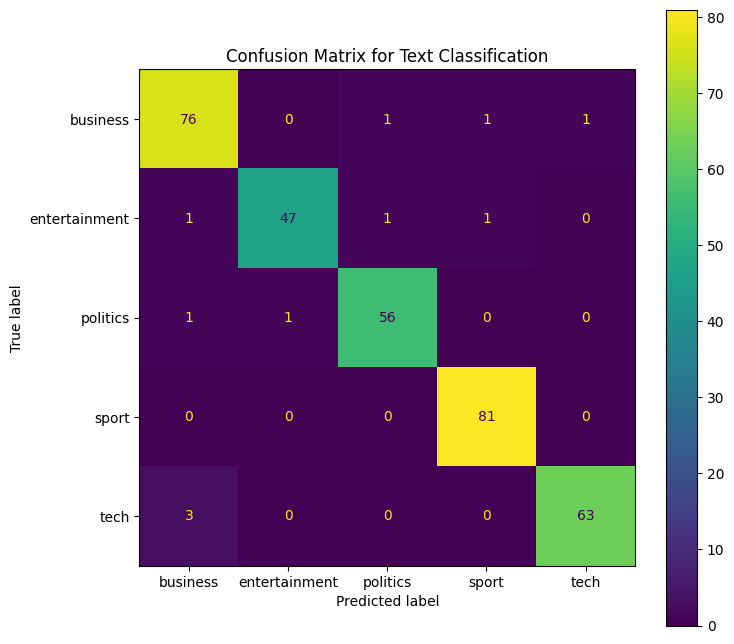

In [29]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Text Classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);